## 1. 헬로우 딥러닝 MNIST

![대체 텍스트](https://i.imgur.com/Un7aQtW.png)

출처 : 밑바닥부터 시작하는 딥러닝

MNIST란? 0-9까지의 손글씨로 쓴 숫자 데이터

미니배치 : 데이터를 적당한 크기로 잘라서 학습

ex) 60,000장의 훈련 데이터중에서 100장을 무작위 뽑아서 100장만을 학습 (밑바닥부터 시작하는 딥러닝에서 나온 내용)

에포크 : 학습 데이터 전체를 한 바퀴 도는 것

In [0]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 784])
# 결과는 0~9 의 10 가지 분류를 가집니다.
Y = tf.placeholder(tf.float32, [None, 10])

# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.415
Epoch: 0002 Avg. cost = 0.151
Epoch: 0003 Avg. cost = 0.099
Epoch: 0004 Avg. cost = 0.070
Epoch: 0005 Avg. cost = 0.053
Epoch: 0006 Avg. cost = 0.042
Epoch: 0007 Avg. cost = 0.033
Epoch: 0008 Avg. cost = 0.026
Epoch: 0009 Avg. cost = 0.019
Epoch: 0010 Avg. cost = 0.019
Epoch: 0011 Avg. cost = 0.015
Epoch: 0012 Avg. cost = 0.013
Epoch: 0013 Avg. cost = 0.013
Epoch: 0014 Avg. cost = 0.013
Epoch: 0015 Avg. cost = 0.011
최적화 완료!
정확도: 0.9801


![대체 텍스트](https://i.imgur.com/tGpF9Mz.png)

출처 : 밑바닥부터 시작하는 딥러닝

드롭아웃 : 학습 시 전체 신경망 중 일부만을 사용하도록 하는 것

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.418
Epoch: 0002 Avg. cost = 0.164
Epoch: 0003 Avg. cost = 0.114
Epoch: 0004 Avg. cost = 0.090
Epoch: 0005 Avg. cost = 0.072
Epoch: 0006 Avg. cost = 0.061
Epoch: 0007 Avg. cost = 0.053
Epoch: 0008 Avg. cost = 0.046
Epoch: 0009 Avg. cost = 0.040
Epoch: 0010 Avg. cost = 0.038
Epoch: 0011 Avg. cost = 0.034
Epoch: 0012 Avg. cost = 0.033
Epoch: 0013 Avg. cost = 0.030
Epoch: 0014 Avg. cost = 0.029
Epoch: 0015 Avg. cost = 0.026
Epoch: 0016 Avg. cost = 0.026
Epoch: 0017 Avg. cost = 0.023
Epoch: 0018 Avg. cost = 0.020
Epoch: 0019 Avg. cost = 0.022
Epoch: 0020 Avg. cost = 0.022
Epoch: 0021 Avg. cost = 0.022
Epoch: 0022 Avg. cost = 0.018
Epoch: 0023 Avg. cost = 0.018
Epoch: 0024 Avg. cost = 0.021
Epoch: 0025 Avg. cost = 0.020
Epoch: 0026 Avg. cost = 0.016
Epoch: 0027 Avg. c

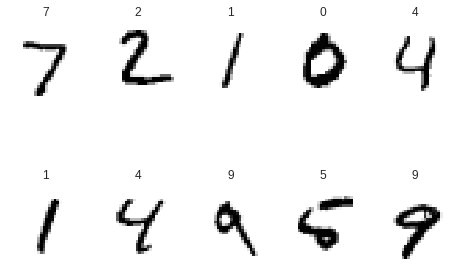

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

#########
# 결과 확인 (matplot)
######
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

# 2. 붓꽃 데이터

https://www.kaggle.com/uciml/iris/data

캐글 데이터 참조 

원본데이터 Iris.csv 참조

https://thebook.io/006723/ch04/01/
Iris 각 특성값들 참조

In [0]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

# 가공한 붓꽃 트레이닝 데이터 입력
xy = np.loadtxt('https://raw.githubusercontent.com/Crpediem/deeprunning-study/master/180317/Iris_train.csv',delimiter=',',
                dtype=np.float32)
x_data = xy[:,0:4]
y_data = xy[:,4:7]

# 가공한 붓꽃 테스트 데이터 입력
test_xy = np.loadtxt('https://raw.githubusercontent.com/Crpediem/deeprunning-study/master/180317/Iris_test.csv',delimiter=',',
                dtype=np.float32)

x_test = test_xy[:,0:4]
y_test = test_xy[:,4:7]

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 3])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([4, 10], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([10, 10], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([10, 3], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(1000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data, keep_prob: 0.8})

    if (step + 1) % 100 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data, keep_prob: 0.8}))

#########
# 결과 확인
# 0: Iris-setosa 1: Iris-versicolor, 2: Iris-virginica
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_test, keep_prob: 1}))
print('실제값:', sess.run(target, feed_dict={Y: y_test, keep_prob: 1}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_test, Y: y_test, keep_prob: 1}))

100 0.23863082
200 0.23964703
300 0.18831006
400 0.23864982
500 0.19743586
600 0.19411115
700 0.18276615
800 0.19053736
900 0.20052955
1000 0.2167687
예측값: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
실제값: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
정확도: 100.00


## csv 파일 데이터 분류

#### 1단계. 데이터 다듬기 

캐글의 원본 csv에서 train과 test에서 사용되지 않을 id값과 label값을 삭제하고
분류되는 값인 Iris-setosa, Iris-versicolor, Iris-virginica을 one-hot 형식으로 변환시켜줍니다.
예) Iris-setosa = 100, Iris-versicolor = 010, Iris-virginica = 001

#### 2단계. train과 test 데이터 나누기

분류한 값을 저장 후 test와 train할 값을 나누어 각각 다른 csv로 저장합니다.

#### 3단계. python list split

생성한 csv에서 학습할 값과 분류되는 값을 분류하여 x_data,y_data에 저장합니다.
test할 데이터도 동일하게 진행합니다.

# 3. Wine data

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

위 주소에서 제공하는 데이터를 가지고 위의 소개한 방법으로 csv파일 분류을 동일하게 진행하여 학습해보도록 하겠습니다.


In [16]:
import tensorflow as tf
import numpy as np

# 가공한 트레이닝 데이터 입력
xy = np.loadtxt('https://raw.githubusercontent.com/Crpediem/deeprunning-study/master/180317/wine_train.csv',delimiter=',',
                dtype=np.float32)
x_data = xy[:,0:13]
y_data = xy[:,13:16]

# 가공한 테스트 데이터 입력
test_xy = np.loadtxt('https://raw.githubusercontent.com/Crpediem/deeprunning-study/master/180317/wine_test.csv',delimiter=',',
                dtype=np.float32)

x_test = test_xy[:,0:13]
y_test = test_xy[:,13:16]

# print(x_data)
# print(y_data)

#########
# 신경망 모델 구성
#####
X = tf.placeholder(tf.float32, [None, 13])
Y = tf.placeholder(tf.float32, [None, 3])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([13, 100], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([100, 100], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([100, 3], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(1000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data, keep_prob: 0.8})

    if (step + 1) % 100 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data, keep_prob: 0.8}))

#########
# 결과 확인
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_test, keep_prob: 1}))
print('실제값:', sess.run(target, feed_dict={Y: y_test, keep_prob: 1}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_test, Y: y_test, keep_prob: 1}))

100 0.5879292
200 0.1710964
300 0.11573343
400 0.08524342
500 0.07245682
600 0.066718794
700 0.082000956
800 0.09255613
900 0.0823765
1000 0.080762655
예측값: [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
실제값: [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
정확도: 100.00


# 4. dropout 효과

![대체 텍스트](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_5/With_Without_Dropout.png)

출처 :  https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/dropout_layer.html

드롭아웃 정리 전, 후 에러율입니다.

차이가 꽤나 나는 것을 보실 수 있습니다.



